# **Spotify Recommendation System**

---

# Introduction
This analysis explores Spotify's "Million Song Dataset" with the goal of uncovering trends and patterns in music features. By applying data science techniques, I aim to gain insights into some of the attributes that shape song recommendation to the users, and ultimately build a personalized recommendation system. The dataset includes features such as tempo, energy, danceability, and genre, offering a rich foundation for understanding the factors that resonate with listeners.

My approach involves data preprocessing, exploratory analysis, and the application of machine learning models to group similar songs and recommend music that aligns with a user’s mood. We leverage dimensionality reduction and clustering techniques to visualize the underlying structure in the data, allowing for intuitive recommendations.


# 1. Load data

In [1]:
# Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
# Load the data
# df = pd.read_csv('/content/drive/Othercomputers/My Laptop - Personal/Files/Data_Files/Portfolio Projects/1 Million songs Spotify/Data/spotify_data.csv', index_col=0) # Google colab file path
df = pd.read_csv('Data/spotify_data.csv', index_col=0) # local file path
df.head()

,artist_name,track_name,track_id,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Jason Mraz,I Won't Give Up,53QF56cjZA9RTuuMZDrSA6,68,2012,acoustic,0.483,0.303,4,-10.058,1,0.0429,0.6940,0.000000,0.1150,0.139,133.406,240166,3
1,Jason Mraz,93 Million Miles,1s8tP3jP4GZcyHDsjvw218,50,2012,acoustic,0.572,0.454,3,-10.286,1,0.0258,0.4770,0.000014,0.0974,0.515,140.182,216387,4
2,Joshua Hyslop,Do Not Let Me Go,7BRCa8MPiyuvr2VU3O9W0F,57,2012,acoustic,0.409,0.234,3,-13.711,1,0.0323,0.3380,0.000050,0.0895,0.145,139.832,158960,4
3,Boyce Avenue,Fast Car,63wsZUhUZLlh1OsyrZq7sz,58,2012,acoustic,0.392,0.251,10,-9.845,1,0.0363,0.8070,0.000000,0.0797,0.508,204.961,304293,4
4,Andrew Belle,Sky's Still Blue,6nXIYClvJAfi6ujLiKqEq8,54,2012,acoustic,0.430,0.791,6,-5.419,0,0.0302,0.0726,0.019300,0.1100,0.217,171.864,244320,4


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1159764 entries, 0 to 1473395
Data columns (total 19 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   artist_name       1159749 non-null  object 
 1   track_name        1159763 non-null  object 
 2   track_id          1159764 non-null  object 
 3   popularity        1159764 non-null  int64  
 4   year              1159764 non-null  int64  
 5   genre             1159764 non-null  object 
 6   danceability      1159764 non-null  float64
 7   energy            1159764 non-null  float64
 8   key               1159764 non-null  int64  
 9   loudness          1159764 non-null  float64
 10  mode              1159764 non-null  int64  
 11  speechiness       1159764 non-null  float64
 12  acousticness      1159764 non-null  float64
 13  instrumentalness  1159764 non-null  float64
 14  liveness          1159764 non-null  float64
 15  valence           1159764 non-null  float64
 16  tempo

| Feature Name | Description |
|---|---|
| popularity | A measure of the song's popularity on Spotify |
| year | The year the song was released |
| genre | The primary genre of the song |
| danceability | Describes how suitable the track is for dancing |
| energy | Represents the perceived intensity and activity level of the track |
| key | The musical key of the song |
| loudness | The overall loudness of the track in decibels (dB) |
| mode | Indicates whether the track is in major (1) or minor (0) key |
| speechiness | The presence of spoken words in the track |
| acousticness | A confidence measure of whether the track is acoustic |
| instrumentalness | The presence of vocals in the track |
| liveness | A confidence measure of whether the track was performed live |
| valence | The positivity conveyed by the track |
| tempo | The average tempo of the track in beats per minute (BPM) |
| time_signature | The time signature of the track |
| duration_minutes | The duration of the track in minutes |

In [5]:
def data_summary(data):
    """
    Summarize the Spotify dataset with flexibility and additional insights.

    Parameters:
        data (DataFrame): A pandas DataFrame containing Spotify data.
    Returns:
        dict: A dictionary of key summary statistics.
    """
    summary = {}

    # Total rows and columns
    summary['total_tracks'] = data.shape[0]
    summary['total_columns'] = data.shape[1]

    # Unique counts and range of years
    summary['unique_artists'] = data['artist_name'].nunique()
    summary['unique_tracks'] = data['track_name'].nunique()
    summary['year_range'] = (data['year'].min(), data['year'].max())

    # Genre insights
    summary['unique_genres'] = data['genre'].nunique()
    summary['genre_distribution'] = data['genre'].value_counts().head(5).to_dict()  # Top 5 genres

    # Track duration statistics
    summary['average_duration'] = round(data['duration_ms'].mean() / 1000, 2)  # seconds
    summary['median_duration'] = round(data['duration_ms'].median() / 1000, 2)
    summary['longest_track'] = data.loc[data['duration_ms'].idxmax(), ['track_name', 'artist_name', 'genre']].to_dict()
    summary['shortest_track'] = data.loc[data['duration_ms'].idxmin(), ['track_name', 'artist_name', 'genre']].to_dict()

    # Most frequent artist
    summary['most_frequent_artist'] = data['artist_name'].mode()[0]

    # Print or return summary
    for key, value in summary.items():
        print(f"{key.replace('_', ' ').capitalize()}: {value}")
    return summary

In [6]:
data_summary(df)

Total tracks: 1159764
Total columns: 19
Unique artists: 64158
Unique tracks: 882360
Year range: (2000, 2023)
Unique genres: 82
Genre distribution: {'black-metal': 21852, 'gospel': 21621, 'ambient': 21389, 'acoustic': 21097, 'alt-rock': 20918}
Average duration: 249.56
Median duration: 225.74
Longest track: {'track_name': 'Babbling Brook Close Up', 'artist_name': 'Nature Sounds', 'genre': 'sleep'}
Shortest track: {'track_name': 'Dominatrix', 'artist_name': 'Olivia Neutered John', 'genre': 'grindcore'}
Most frequent artist: Traditional


{'total_tracks': 1159764,
 'total_columns': 19,
 'unique_artists': 64158,
 'unique_tracks': 882360,
 'year_range': (2000, 2023),
 'unique_genres': 82,
 'genre_distribution': {'black-metal': 21852,
  'gospel': 21621,
  'ambient': 21389,
  'acoustic': 21097,
  'alt-rock': 20918},
 'average_duration': 249.56,
 'median_duration': 225.74,
 'longest_track': {'track_name': 'Babbling Brook Close Up',
  'artist_name': 'Nature Sounds',
  'genre': 'sleep'},
 'shortest_track': {'track_name': 'Dominatrix',
  'artist_name': 'Olivia Neutered John',
  'genre': 'grindcore'},
 'most_frequent_artist': 'Traditional'}

In [7]:
# Most common genre
# Group the data by year and find the most common genre for each year
most_common_genre_per_year = (
    df.groupby('year')['genre']
    .agg(lambda x: x.mode()[0] if not x.mode().empty else None)
    .to_dict()
)

# Display the dictionary
print("Most common genre per year:")
most_common_genre_per_year

Most common genre per year:


{2000: 'ambient',
 2001: 'ambient',
 2002: 'gospel',
 2003: 'ambient',
 2004: 'ambient',
 2005: 'ambient',
 2006: 'indian',
 2007: 'ambient',
 2008: 'ambient',
 2009: 'comedy',
 2010: 'ambient',
 2011: 'comedy',
 2012: 'black-metal',
 2013: 'comedy',
 2014: 'comedy',
 2015: 'comedy',
 2016: 'acoustic',
 2017: 'comedy',
 2018: 'comedy',
 2019: 'comedy',
 2020: 'comedy',
 2021: 'chill',
 2022: 'comedy',
 2023: 'black-metal'}

In [8]:
# Check for null values
null_values = df.isna().sum()
null_values

artist_name         15
track_name           1
track_id             0
popularity           0
year                 0
genre                0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
duration_ms          0
time_signature       0
dtype: int64

In [9]:
# Since there is now way we could get the name of artists or track due to multiple titles that exist, we can drop them
df = df.dropna()
df.isna().sum()

artist_name         0
track_name          0
track_id            0
popularity          0
year                0
genre               0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
dtype: int64

In [10]:
# Check for duplicates
df.duplicated().sum()

0

In [11]:
df.columns

Index(['artist_name', 'track_name', 'track_id', 'popularity', 'year', 'genre',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'time_signature'],
      dtype='object')

**Skewness:**

Measures the asymmetry of the distribution.
Positive skew indicates a long tail on the right.
Negative skew indicates a long tail on the left.

**Kurtosis:**

Measures the "tailedness" of the distribution.
A high kurtosis indicates a distribution with heavier tails.
A low kurtosis indicates a distribution with lighter tails.

In [12]:
# Statistical check: Skewness and Kurtosis
numerical_cols_df = df[['popularity', 'year',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'time_signature']]
skewness = numerical_cols_df.skew()
kurtosis = numerical_cols_df.kurtosis()

print("Skewness:\n", skewness)
print("\nKurtosis:\n", kurtosis)

Skewness:
 popularity           0.810033
year                -0.110886
danceability        -0.300162
energy              -0.617285
key                 -0.000085
loudness            -1.908822
mode                -0.559289
speechiness          4.473831
acousticness         0.708284
instrumentalness     0.970880
liveness             1.955640
valence              0.173532
tempo                0.237165
duration_ms         10.301177
time_signature      -3.550804
dtype: float64

Kurtosis:
 popularity            0.065254
year                 -1.169703
danceability         -0.501779
energy               -0.649378
key                  -1.286298
loudness              4.863285
mode                 -1.687199
speechiness          23.917106
acousticness         -1.068162
instrumentalness     -0.861880
liveness              3.502836
valence              -1.077568
tempo                -0.099001
duration_ms         228.305416
time_signature       19.754864
dtype: float64


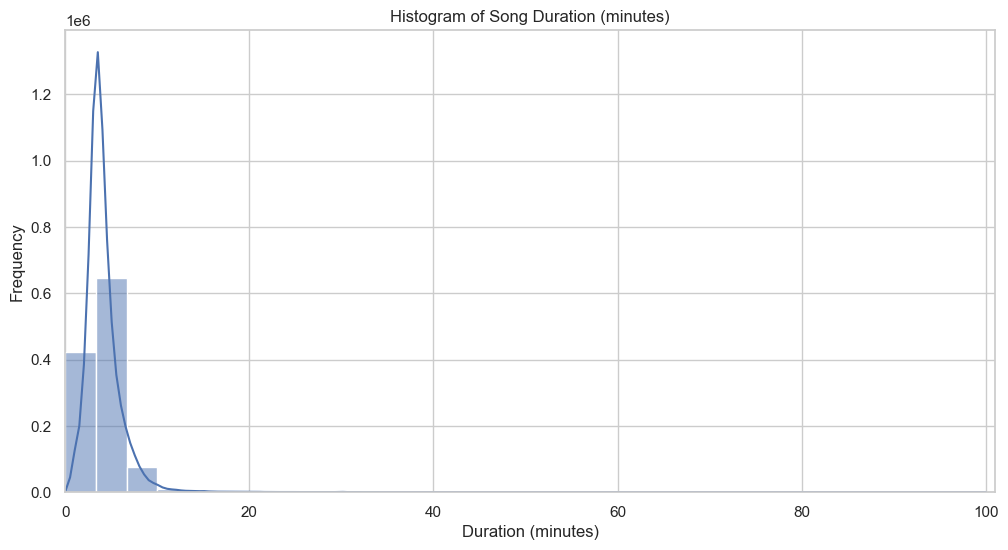

In [13]:
# Create a histogram for duration_ms
# Convert duration from milliseconds to minutes (new column)
df['duration_minutes'] = df['duration_ms'] / 60000

# Set the style for the plot
sns.set(style="whitegrid")

# Create a histogram for duration_minutes
plt.figure(figsize=(12, 6))
sns.histplot(df['duration_minutes'], bins=30, kde=True)  # Adjust the number of bins as needed
plt.title('Histogram of Song Duration (minutes)')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.xlim(0, df['duration_minutes'].max() + 1)  # Set x-axis limit slightly above max duration for clarity
plt.show()

 - For songs that are in 7 to 15 minute range, most are live performances which tend to take long.
 - Those beyond 15 minutes to 100 are tracks that aren't songs but could be rain sounds that help people sleep hence take long to play entirely. This can be visualized below.


C:\Users\Hp\anaconda3\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: xlabel='duration_minutes'>

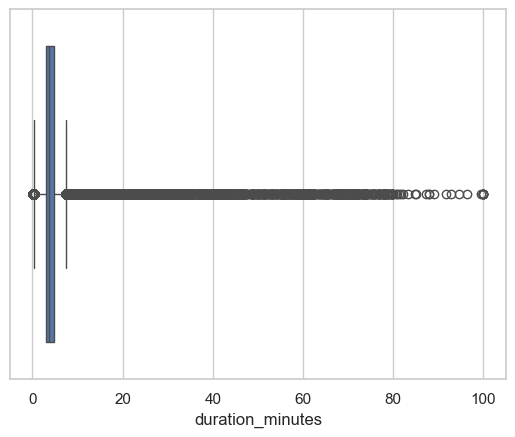

In [14]:
# Time duaration from tracks
sns.boxplot(x=df['duration_minutes'])

C:\Users\Hp\anaconda3\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: xlabel='popularity'>

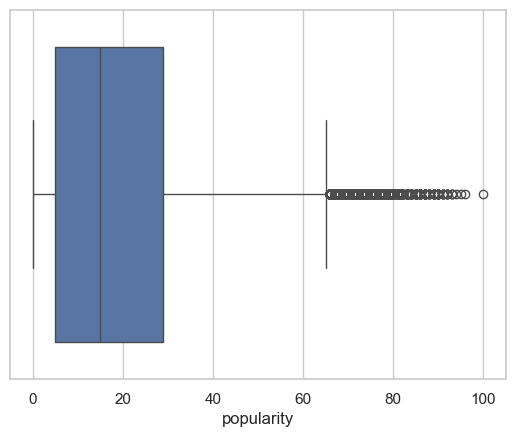

In [15]:
# Popularity visualization
sns.boxplot(x=df['popularity'])

- Seems to be a few songs that are popular than the general data shows. This is expected when it comes to songs from top artists
- 100 minute songs seems unrealistic. Check them by manually searching a sample of them. Beginning by filtering out songs longer than 7 minutes and less that 15 minutes

In [16]:
# Filter for songs with duration greater than 7 minutes but less than 15 minutes
filtered_songs = df[(df['duration_minutes'] > 7) & (df['duration_minutes'] < 15)].sort_values(by='duration_minutes', ascending=False)
filtered_songs

,artist_name,track_name,track_id,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,duration_minutes
103535,Dean Evenson,River & Forest,5eOE2heqHXkNK6JtJBYcEh,11,2013,sleep,0.105,0.991,2,-28.225,1,0.0607,0.699000,0.95000,0.8970,0.00001,71.743,899907,3,14.998450
105982,La Fleur,Nightflow - Kenny Larkin Drama Mix,0GCpvx0AVrRVavO0SsJGO9,11,2013,swedish,0.917,0.472,11,-10.165,0,0.1300,0.002620,0.10400,0.0763,0.20800,124.015,899864,4,14.997733
209244,Mägo de Oz,Finisterra - 2015,5EtziAX36pgTziXYH4qs1B,32,2015,spanish,0.219,0.916,4,-4.349,0,0.1030,0.005950,0.00114,0.7040,0.43400,74.951,899800,4,14.996667
624758,Lustmord,Black Star,4ikSsfzbD6BNuyWA60x0CO,21,2000,ambient,0.166,0.382,6,-15.946,1,0.0448,0.683000,0.96100,0.6650,0.03590,133.107,899696,4,14.994933
278246,Derisier,Debloke'm Pou Yo We,65KHxK2bgbxWfsyhGEFUz8,22,2017,gospel,0.384,0.855,7,-8.011,1,0.0813,0.219000,0.00000,0.3540,0.74900,99.023,899693,4,14.994883
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1197497,Krystian Shek,Mongopusher - E-Minor Mix,7rgct1cQflRRjWAuzevoJT,0,2008,chill,0.801,0.397,7,-13.368,1,0.0814,0.002580,0.83000,0.0545,0.42600,123.997,420005,4,7.000083
1234792,MiniCoolBoyz,Our Stomach,4PBLd5DxsScWZyphJRIaJK,0,2008,minimal-techno,0.807,0.446,10,-11.706,0,0.1160,0.139000,0.84200,0.0948,0.03980,127.979,420003,4,7.000050
798612,Leggo Beast,Elephant Legs,4duJPpY7UqJCGEyXgf39Re,0,2002,ambient,0.771,0.377,6,-18.424,0,0.0513,0.223000,0.83700,0.0961,0.22500,119.991,420003,4,7.000050
740659,DJ Fixx,Make The Beat Pound,0NgbI3WDsUNQHVw4e2Il8E,0,2001,breakbeat,0.784,0.863,10,-12.327,0,0.0763,0.000072,0.89600,0.0822,0.53700,135.977,420001,4,7.000017


In [17]:
# Filter songs greater than 15 minutes
filtered_songs_greater_15 = df[df['duration_minutes'] > 15].sort_values(by='duration_minutes', ascending=False)
filtered_songs_greater_15.sample(2)

,artist_name,track_name,track_id,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,duration_minutes
1471560,Schiller,Zenit (feat. Klaus Schulze),63J6glG0l2YgqONow1t2ZP,1,2011,techno,0.509,0.806,10,-13.016,0,0.0331,0.110,0.9400,0.368,0.622,95.005,1088080,4,18.134667
96198,Grateful Dead,"Shakedown Street - Live at Rainbow Theatre, Lo...",5y8raBUKqvSQ1ap4pdJAZs,14,2013,psych-rock,0.626,0.437,10,-17.063,1,0.0384,0.588,0.0052,0.455,0.793,105.935,933027,4,15.550450


In [18]:
# View the sleep genre as it is common in the longer duration tracks
sleep_genre = df[df['genre'] == 'sleep']
sleep_genre.shape

(17851, 20)

In [19]:
sleep_genre.head(3)

,artist_name,track_name,track_id,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,duration_minutes
49942,Rain Sounds,White Noise,7dTyZl4cBRKnPBeq1fdrHY,60,2012,sleep,0.0000,0.601,4,-13.753,0,0.0000,0.119000,0.771,0.968,0.0000,0.000,240000,0,4.000000
49943,Nature Sounds,Relaxing Constant Rain Storm with Distant Thun...,1nKY2o8XQG1RvUCpBV5VSK,54,2012,sleep,0.0735,0.997,8,-12.484,1,0.0995,0.000626,0.975,0.871,0.0119,81.214,570203,4,9.503383
49944,Nature Sounds,Calm Rolling Thunder and Soothing Rain,5Y3bt7xbhZwwHfTPK5hWEg,50,2012,sleep,0.0818,0.294,0,-25.842,1,0.0898,0.067400,0.893,0.359,0.0384,85.349,570270,3,9.504500


## Feature Engineering
- Scale the numerical features
- Encode categorical feature such as genre and artist name

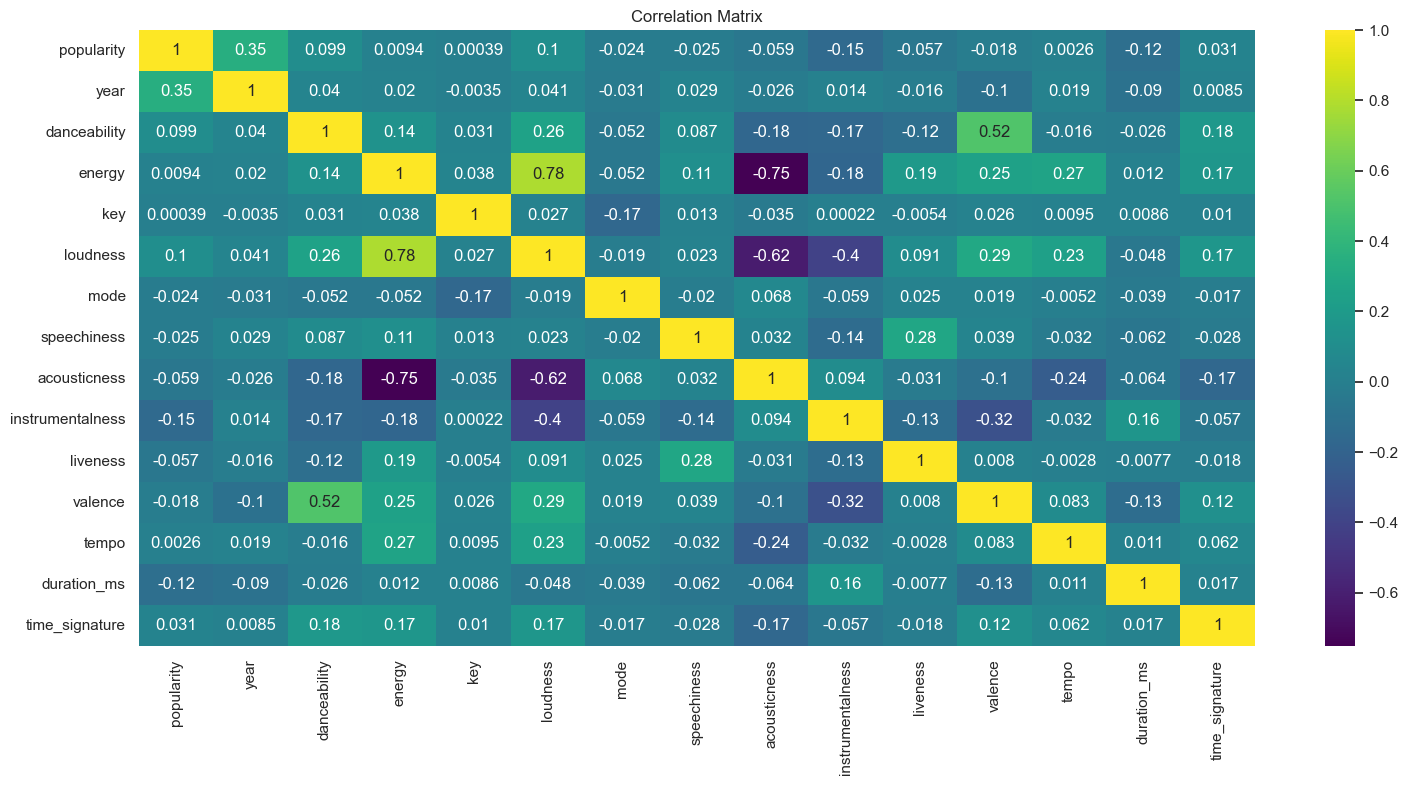

In [20]:
# Correlation matrix
correlation_matrix = numerical_cols_df.corr()

# Create a heatmap
plt.figure(figsize=(18, 8))

sns.heatmap(correlation_matrix, annot=True, cmap='viridis')
plt.title('Correlation Matrix')
plt.show()

- Features that seem not to be relevant (ie 0 and below)
  - Mode
  - Key
  - Year
  - popularity
  - duration_ms/minutes

In [21]:
genres = df['genre'].unique()
print(len(genres))
genres

82


array(['acoustic', 'afrobeat', 'alt-rock', 'ambient', 'black-metal',
       'blues', 'breakbeat', 'cantopop', 'chicago-house', 'chill',
       'classical', 'club', 'comedy', 'country', 'dance', 'dancehall',
       'death-metal', 'deep-house', 'detroit-techno', 'disco',
       'drum-and-bass', 'dub', 'dubstep', 'edm', 'electro', 'electronic',
       'emo', 'folk', 'forro', 'french', 'funk', 'garage', 'german',
       'gospel', 'goth', 'grindcore', 'groove', 'guitar', 'hard-rock',
       'hardcore', 'hardstyle', 'heavy-metal', 'hip-hop', 'house',
       'indian', 'indie-pop', 'industrial', 'jazz', 'k-pop', 'metal',
       'metalcore', 'minimal-techno', 'new-age', 'opera', 'party',
       'piano', 'pop', 'pop-film', 'power-pop', 'progressive-house',
       'psych-rock', 'punk', 'punk-rock', 'rock', 'rock-n-roll',
       'romance', 'sad', 'salsa', 'samba', 'sertanejo', 'show-tunes',
       'singer-songwriter', 'ska', 'sleep', 'songwriter', 'soul',
       'spanish', 'swedish', 'tango', 'tec

In [22]:
# drop the irrelevant colunmns
data = df.drop(['duration_ms','duration_minutes'], axis=1)
data.columns

Index(['artist_name', 'track_name', 'track_id', 'popularity', 'year', 'genre',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'time_signature'],
      dtype='object')

# Feature Engineering

- Start by converting genre values to binary values
- Encode **genre** column
- Scale features

In [23]:
# Encode 'genre', drop irrelevant columns, scale features
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

# Encode the 'genre' column
label_encoder = LabelEncoder()
data['genre_encoded'] = label_encoder.fit_transform(data['genre'])

# Drop irrelevant columns
data_encoded = data.drop(['artist_name', 'track_name', 'track_id', 'genre'], axis=1)

# Check for non-numeric columns
print(data_encoded.dtypes)

popularity            int64
year                  int64
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature        int64
genre_encoded         int32
dtype: object


In [24]:
# Scale numerical features
scaler = MinMaxScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data_encoded), columns=data_encoded.columns)

data_scaled.isna().sum()

popularity          0
year                0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
genre_encoded       0
dtype: int64

In [25]:
# View shape of the scaled dataframe
data_scaled.shape

(1159748, 15)

## Modeling
- Use K-Nearest Neighbors (KNN) for recommendation, to reduce dimensions. This model finds the nearest neighbors for each sample in the dataset. It uses the Euclidean distance by default, which can be changed to other distance metrics if needed.

In [26]:
from sklearn.neighbors import NearestNeighbors

# Fit the k-NN model on the scaled dataset
knn = NearestNeighbors(n_neighbors=6, algorithm='auto')  # Adjust 'n_neighbors' to your preferred number of recommendations
knn.fit(data_scaled)

# To generate recommendations for all songs in the dataset
# distances, indices = knn.kneighbors(data_scaled)


NearestNeighbors(n_neighbors=6)

## Evaluate the model
- Evaluating a KNN model in a recommendation system by assessing how well it groups similar songs together.

- Intrinsic Evaluation: Use clustering metrics like the Silhouette Score to evaluate how well songs are grouped in feature space.

In [27]:
# Evaluate the model
from sklearn.metrics import silhouette_score

# Compute the Silhouette Score
# Labels are inferred from the nearest neighbors
silhouette = silhouette_score(data_scaled, knn.kneighbors(data_scaled, return_distance=False)[:, 0])

print(f"Silhouette Score: {silhouette}")

Silhouette Score: 0.002045266958758462


In [34]:
# Function to Recommend Songs by Name
def recommend_songs_by_name(song_name, data, knn_model, data_scaled, top_n=5):
    """
    Recommend songs similar to the given song name.

    Parameters:
    - song_name (str): The name of the song to find recommendations for.
    - data (DataFrame): DataFrame containing song IDs and features.
    - knn_model (NearestNeighbors): Pre-trained k-NN model.
    - data_scaled (numpy.ndarray): Scaled feature array.
    - top_n: Number of recommendations to return.

    Returns:
    - List of recommended song names with distances.
    """
    # Check if the song name exists in the data
    if song_name not in data["title"].values:
        return f"Error: Song name '{song_name}' not found in the dataset."

    # Find the index of the song
    song_index = data[song_data["title"] == song_name].index[0]

    # Find the k nearest neighbors
    distances, indices = knn_model.kneighbors([data_scaled[song_index]])

    # Compile recommendations
    recommendations = [
        {"title": data.iloc[idx]["title"], "distance": dist}
        for idx, dist in zip(indices[0][1:top_n + 1], distances[0][1:top_n + 1])
    ]

    return recommendations

In [47]:
# Function to recommend similar songs
def recommend_song(track_name, data_scaled, original_data, knn_model):
    song_index = get_song_index(track_name, original_data)
    if song_index is not None:
        # Extract the corresponding row from data_scaled as a DataFrame
        song_vector = data_scaled.loc[[song_index]]  # Maintain as DataFrame
        distances, indices = knn_model.kneighbors(song_vector)  # Get neighbors
        
        # Map indices to song names
        recommended_songs = [
            original_data.iloc[i]['track_name'] for i in indices.flatten() if i != song_index
        ]  # Exclude the input song
        return recommended_songs
    else:
        return None

In [48]:
data.head()

,artist_name,track_name,track_id,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,genre_encoded
0,Jason Mraz,I Won't Give Up,53QF56cjZA9RTuuMZDrSA6,68,2012,acoustic,0.483,0.303,4,-10.058,1,0.0429,0.6940,0.000000,0.1150,0.139,133.406,3,0
1,Jason Mraz,93 Million Miles,1s8tP3jP4GZcyHDsjvw218,50,2012,acoustic,0.572,0.454,3,-10.286,1,0.0258,0.4770,0.000014,0.0974,0.515,140.182,4,0
2,Joshua Hyslop,Do Not Let Me Go,7BRCa8MPiyuvr2VU3O9W0F,57,2012,acoustic,0.409,0.234,3,-13.711,1,0.0323,0.3380,0.000050,0.0895,0.145,139.832,4,0
3,Boyce Avenue,Fast Car,63wsZUhUZLlh1OsyrZq7sz,58,2012,acoustic,0.392,0.251,10,-9.845,1,0.0363,0.8070,0.000000,0.0797,0.508,204.961,4,0
4,Andrew Belle,Sky's Still Blue,6nXIYClvJAfi6ujLiKqEq8,54,2012,acoustic,0.430,0.791,6,-5.419,0,0.0302,0.0726,0.019300,0.1100,0.217,171.864,4,0


In [49]:
# Test
song_name_input = input("Enter a song name: ")

recommended_songs = recommend_song(song_name_input, data_scaled, data, knn)

if recommended_songs:
    print(f"Recommended songs for '{song_name_input}':")
    for song in recommended_songs:
        print(song)
else:
    print("No recommendations found.")

Enter a song name: Do Not Let Me Go
Recommended songs for 'Do Not Let Me Go':
I Am Not Alone - Radio Version
Fix You
Oceans (Where Feet My Fail) - Live/Acoustic Version
Future Days
I Was Made For Loving You
